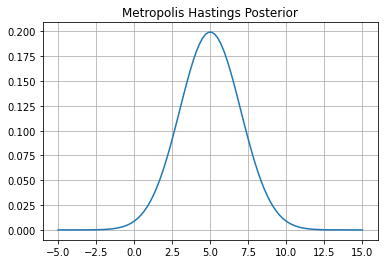

C:\Users\aympa\AppData\Local\Temp/ipykernel_14160/814918916.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array(samples)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

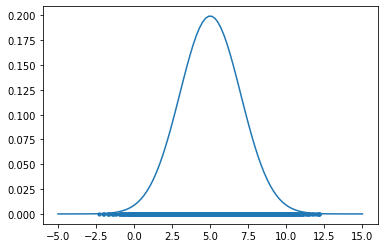

In [6]:
#----------------------------------------------------------------------------------------#
# define posterior distribution

def posterior(x):
    mu, sigma = 5, 2.0 # mean and standard deviation
    num = math.exp( - ( x - mu )**2 / ( 2.0 * sigma **2 ) )
    den = math.sqrt( 2 * math.pi * sigma **2)
    return  num / den

#----------------------------------------------------------------------------------------#
# plot posterior

x_array = np.linspace(-5.0, 15.0, 100)
y_array = np.asarray( [posterior(x) for x in x_array] )

plt.plot(x_array,y_array)

plt.grid()
plt.title('Metropolis Hastings Posterior')
plt.savefig('posterior.png',bbox_inches='tight')
plt.show()
plt.close()

#----------------------------------------------------------------------------------------#
# Metropolis Hastings sampling from the posterior distribution

N = 100000
s = 10

x = 0
p = posterior(x)

samples = []

for i in range(N):
    xn = x + np.random.normal(size=1)
    pn = posterior(xn)
    if pn >= p:
        p = pn
        x = xn
    else:
        u = np.random.rand()
        if u < pn/p:
            p = pn
            x = xn
    if i % s == 0:
        samples.append(x)

samples = np.array(samples)

plt.scatter(samples, np.zeros_like(samples), s=10)

plt.plot(x_array,y_array)
plt.hist(samples, bins=50,density=1)

plt.title('Metropolis Hastings sampling')
plt.grid()
plt.savefig('metropolis_hastings_1d.png',bbox_inches='tight')
plt.show()
plt.close()
